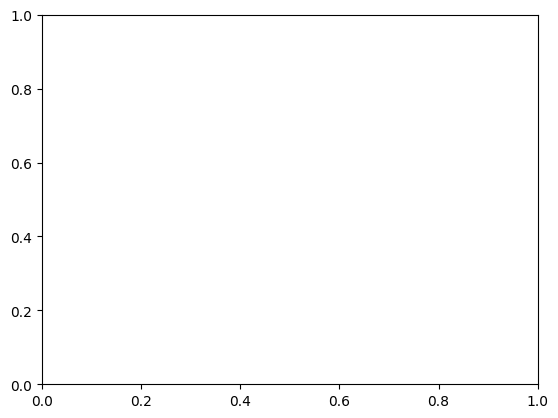

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
import random
from glob import glob
import re
import os
import json
import numpy as np

from math import ceil

from importlib import reload

from qubo_utils import load_QUBO, solve_QUBO
import MIS_inst as MIS
import TSP_inst as TSP
import MWC_inst as MWC
reload(MWC); reload(MIS); reload(TSP)
from time import time

['./instances/QUBO/UDMIS037EXT_15_N15_W1.0_R0.3.qubo.json',
 './instances/QUBO/UDMIS040EXT_25_N25_W1.0_R0.2.qubo.json',
 './instances/QUBO/UDMIS043EXT_30_N30_W1.0_R0.2.qubo.json',
 './instances/QUBO/UDMIS046EXT_36_N36_W1.0_R0.2.qubo.json',
 './instances/QUBO/UDMIS049EXT_40_N40_W1.0_R0.2.qubo.json',
 './instances/QUBO/UDMIS052EXT_49_N49_W1.0_R0.2.qubo.json',
 './instances/QUBO/UDMIS055EXT_60_N60_W1.0_R0.2.qubo.json',
 './instances/QUBO/UDMIS058EXT_70_N70_W1.0_R0.1.qubo.json',
 './instances/QUBO/UDMIS061EXT_80_N80_W1.0_R0.1.qubo.json',
 './instances/QUBO/UDMIS064EXT_90_N90_W1.0_R0.1.qubo.json',
 './instances/QUBO/UDMIS067EXT_100_N100_W1.0_R0.1.qubo.json',
 './instances/QUBO/UDMIS070EXT_120_N120_W1.0_R0.1.qubo.json']

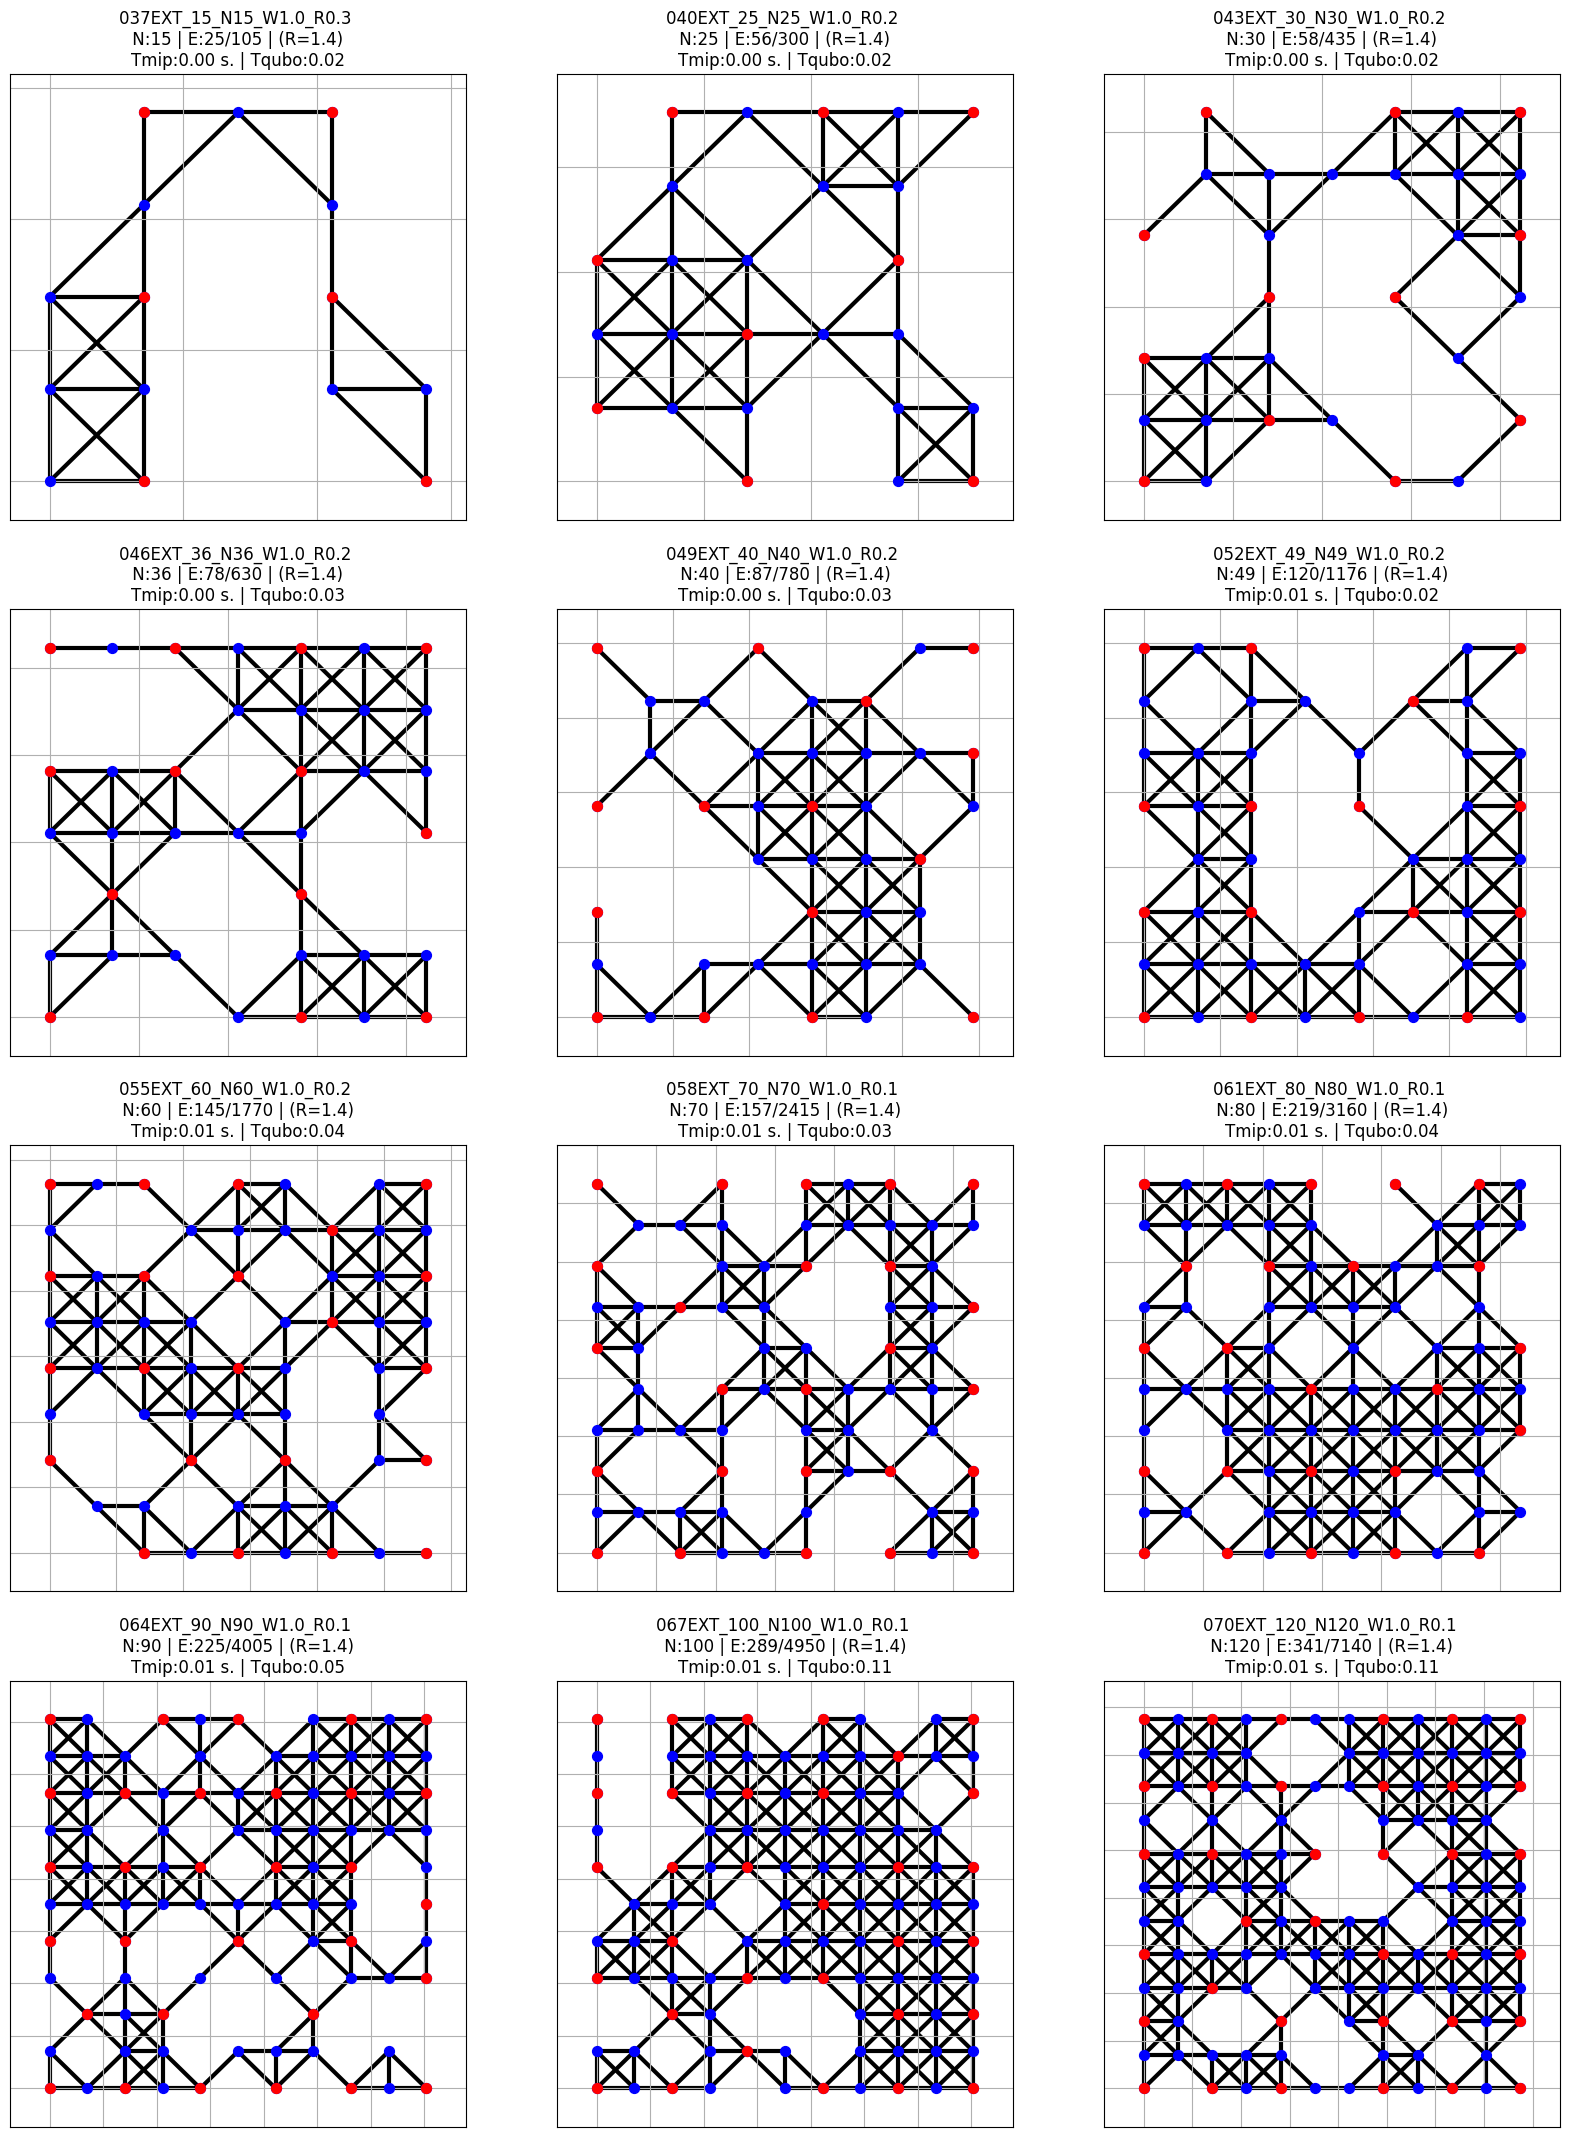

In [14]:
MIS.draw_IDs_grid([f"{12*3+1+j*3}EXT" for j in range(12)], directory="./instances/QUBO")

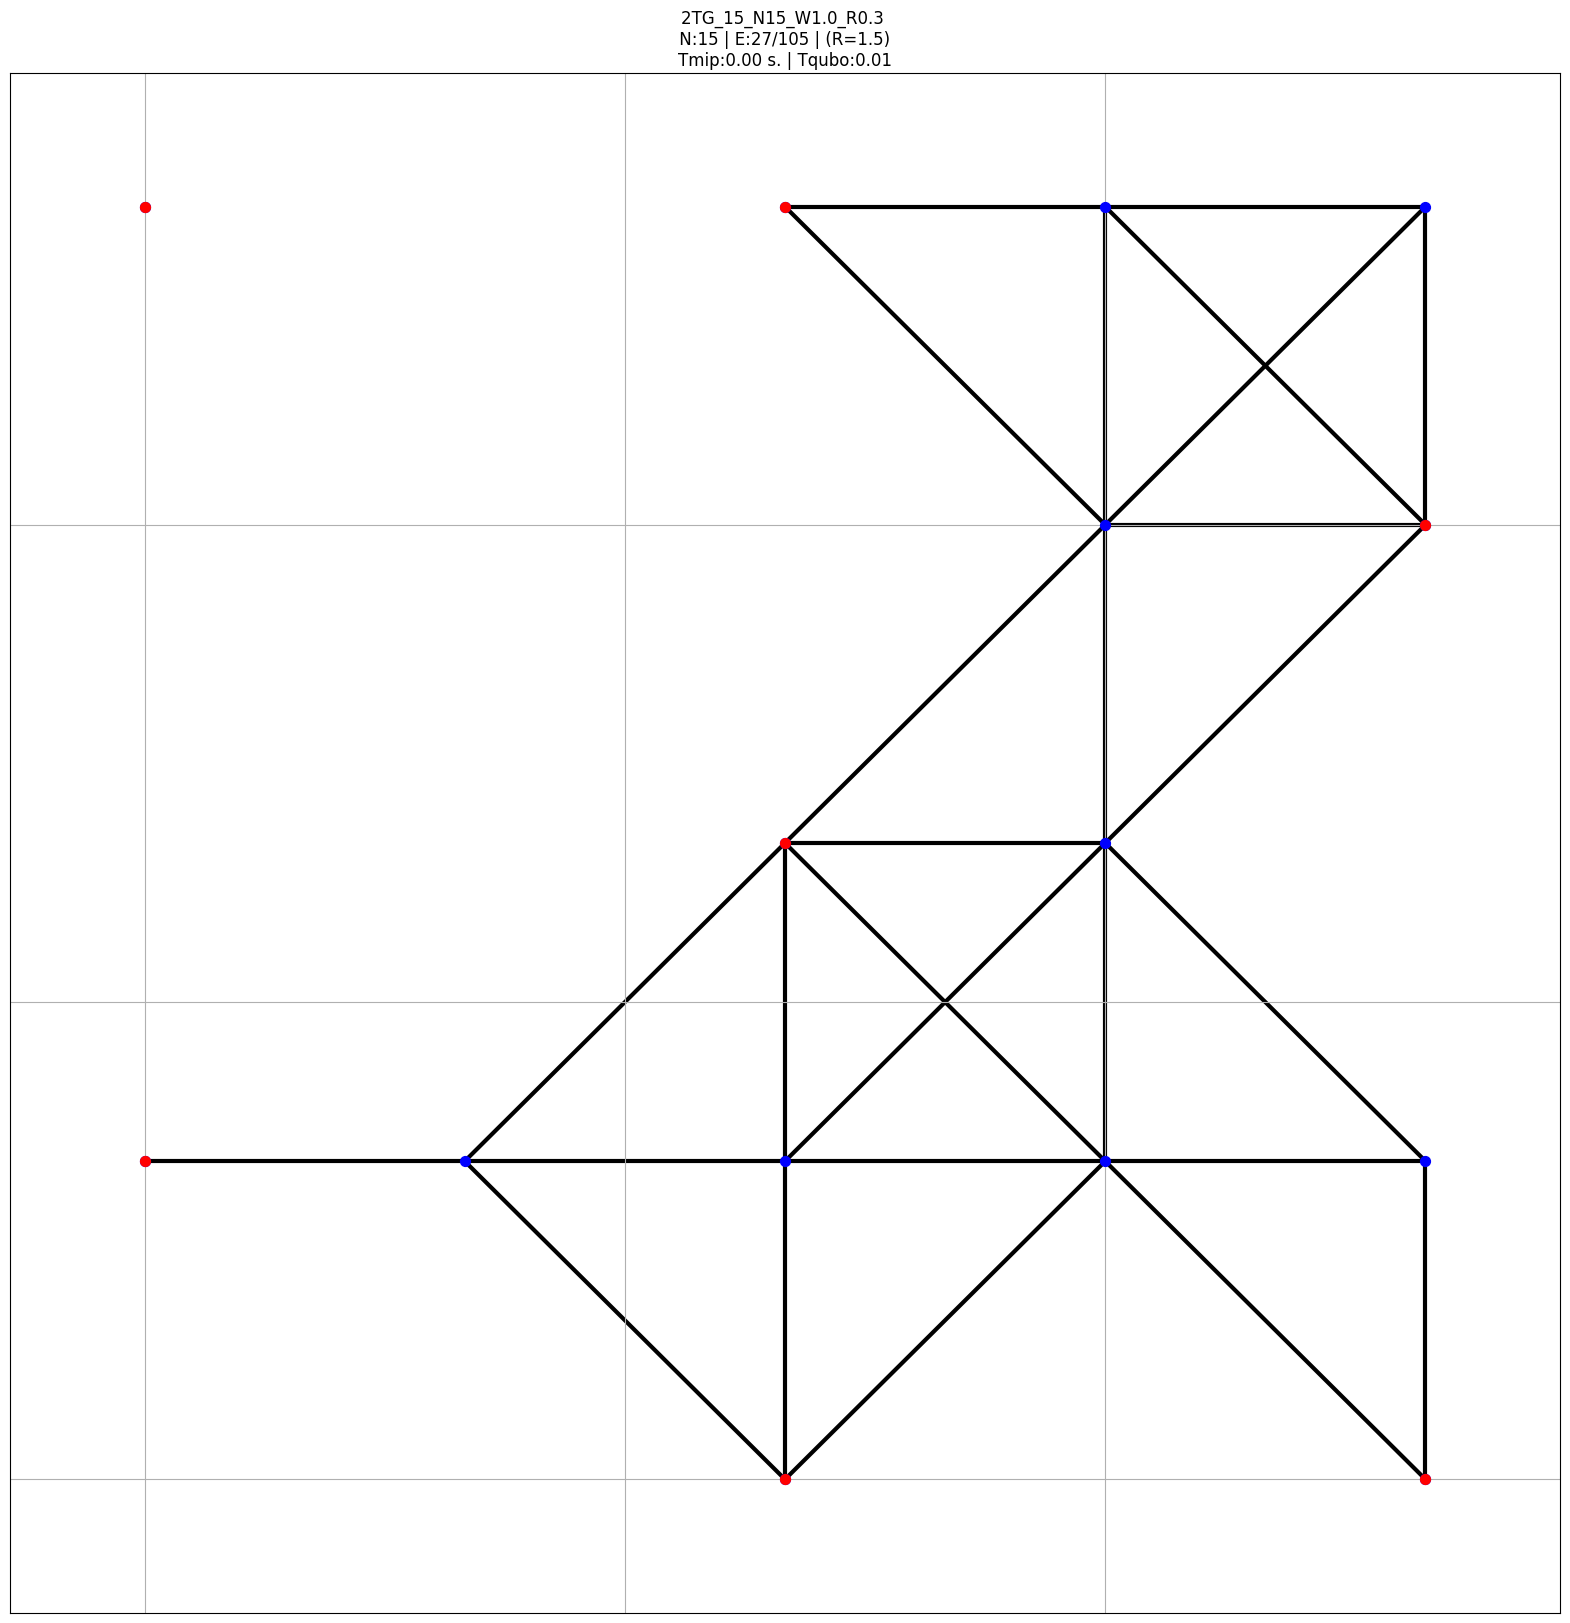

In [3]:
MIS.draw_inst_grid(['./instances/QUBO/UDMIS2TG_15_N15_W1.0_R0.3.qubo.json'])

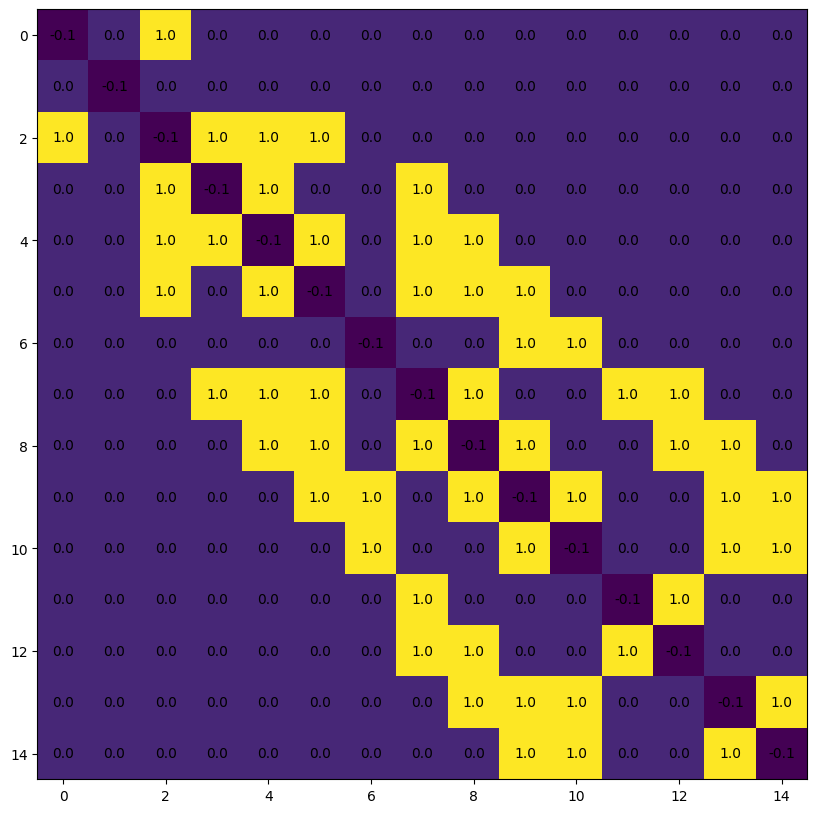

In [18]:
plt.figure(figsize=(16,10))

qubofile = './instances/QUBO/UDMIS2TG_15_N15_W1.0_R0.3.qubo.json'

with open(qubofile, 'r') as infile:
    js = json.load(infile)

Q = np.array(js['Q'])
P = np.array(js['P'])

Qm = Q/2 + np.diag(P)
scaling_factor = 1 / np.max(np.abs(Qm))

plt.imshow(Qm * scaling_factor, cmap='viridis')
for (k,l),label in np.ndenumerate(Qm*scaling_factor):
    plt.text(l,k,f"{label:.1f}",ha='center',va='center', fontsize=10)
plt.show()

In [22]:
G, origjs = MIS.load_orig_MIS(js["description"]["original_instance_file"])
model, x = MIS.create_orig_MIS_IP(G)
model.update()
model.display()

Maximize
x[1] + x[2] + x[3] + x[4] + x[5] + x[6] + x[7] + x[8] + x[9] + x[10] + x[11] + x[12]
+ x[13] + x[14] + x[15]
Subject To
  edge_constr[1,3]: x[1] + x[3] <= 1
  edge_constr[3,4]: x[3] + x[4] <= 1
  edge_constr[3,5]: x[3] + x[5] <= 1
  edge_constr[3,6]: x[3] + x[6] <= 1
  edge_constr[4,5]: x[4] + x[5] <= 1
  edge_constr[4,8]: x[4] + x[8] <= 1
  edge_constr[5,6]: x[5] + x[6] <= 1
  edge_constr[5,8]: x[5] + x[8] <= 1
  edge_constr[5,9]: x[5] + x[9] <= 1
  edge_constr[6,8]: x[6] + x[8] <= 1
  edge_constr[6,9]: x[6] + x[9] <= 1
  edge_constr[6,10]: x[6] + x[10] <= 1
  edge_constr[7,10]: x[7] + x[10] <= 1
  edge_constr[7,11]: x[7] + x[11] <= 1
  edge_constr[8,9]: x[8] + x[9] <= 1
  edge_constr[8,12]: x[8] + x[12] <= 1
  edge_constr[8,13]: x[8] + x[13] <= 1
  edge_constr[9,10]: x[9] + x[10] <= 1
  edge_constr[9,13]: x[9] + x[13] <= 1
  edge_constr[9,14]: x[9] + x[14] <= 1
  edge_constr[10,11]: x[10] + x[11] <= 1
  edge_constr[10,14]: x[10] + x[14] <= 1
  edge_constr[10,15]: x[10] + x[1